<a href="https://colab.research.google.com/github/feniltailor22/Feature-Engineering/blob/main/2)_Handling_missing_values_Continue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2) Random Sample Imputation**

**Aim:** Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

**When it should be used?**

It Assumes that the data are Missing Completely At Random(MCAR).

In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('/content/titanic_train.csv', usecols=['Age', 'Survived', 'Fare'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [6]:
df['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [7]:
df['Age'].dropna().sample(5)

169    28.0
618     4.0
765    51.0
12     20.0
637    31.0
Name: Age, dtype: float64

In [8]:
#Dropping the NaN Values to take Samples from it and sampling the NaN values   
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [9]:
#Getting the index of Sampled values
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0).index

Int64Index([423, 177, 305, 292, 889, 595, 637,  54, 456, 110,
            ...
            179,  24, 630, 458,  49, 539, 267, 352,  99, 689],
           dtype='int64', length=177)

In [10]:
#Getting the index of NaN values
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [11]:
from numpy.ma.extras import median
def Impute_NaN(df,feature):
  df[feature+'_with_Median']= df[feature].fillna(df[feature].median())
  #copying the feature 
  df[feature+'_Random']= df[feature]
  #generating random samples to fill NaN values
  random_samples= df[feature].dropna().sample(df[feature].isnull().sum(), random_state=0)
  #Pandas need to have same index in order to merge the dataset
  random_samples.index= df[df[feature].isnull()].index
  df.loc[df[feature].isnull(), feature+'_Random']= random_samples

In [12]:
Impute_NaN(df,'Age')

In [13]:
df.head()

,Survived,Age,Fare,Age_with_Median,Age_Random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [14]:
df.isnull().sum()

Survived             0
Age                177
Fare                 0
Age_with_Median      0
Age_Random           0
dtype: int64

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

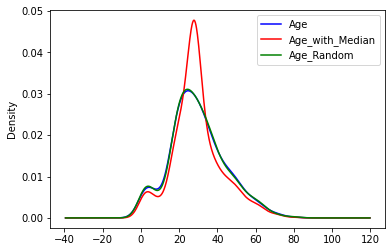

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.Age.plot(kind='kde', ax=ax, color='blue')
df.Age_with_Median.plot(kind='kde', ax=ax, color='red')
df.Age_Random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

**Advantages**
1. Easy To implement
2. There is less distortion in variance

**Disadvantage**
1. Every situation randomness wont work

**3) Capturing NaN values with a new feature**

 It works well if we have Missing Data Not At Random(MNAR).

In [17]:
df=pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [18]:
df['Age_NaN']= np.where(df['Age'].isnull(), 1, 0)

In [19]:
df.head(10)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [20]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [21]:
df.head(10)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


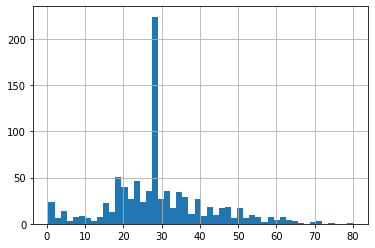

In [22]:
df.Age.hist(bins=50)

**Advantages**

1. Easy to implement
2. Captures the importance of missing values i.e. we are adding Age_NaN column in the dataset so that model can get to know that there is some importace of the missing values in the dataset.

**Disadvantages**

1. Creating Additional Features(Curse of Dimensionality)

**4) End of Distribution imputation**

 It works well if we have Missing Data Not At Random(MNAR).

 Taking the values from the End of Distribution (the 3rd Std Distribution) and replacing the NaN value with it.

  Replace missing data with values that are at the tails of the distribution of the variable.

In [23]:
df=pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


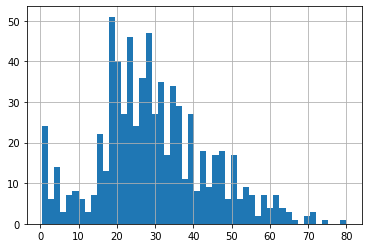

In [24]:
df.Age.hist(bins=50)

In [25]:
#calculating the data of 3rd Standard Deviation
extreme= df.Age.mean()+3*df.Age.std()
extreme

73.27860964406095

In [33]:
def Impute_Nan(df,feature,median,extreme):
    df[feature+'_end_distribution']=df[feature].fillna(extreme)
    df[feature+'_with_Median']= df[feature].fillna(median)

In [34]:
Impute_Nan(df, 'Age', df.Age.median(), extreme)

In [35]:
df.head()

,Survived,Age,Fare,Age_end_distribution,Age_with_Median
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


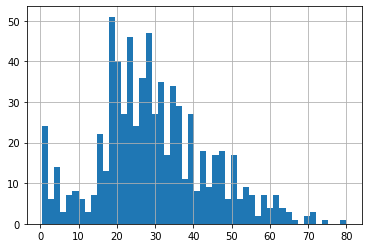

In [37]:
df.Age.hist(bins=50)

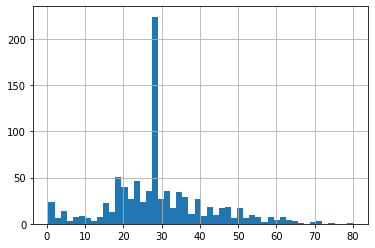

In [40]:
df.Age_with_Median.hist(bins=50)

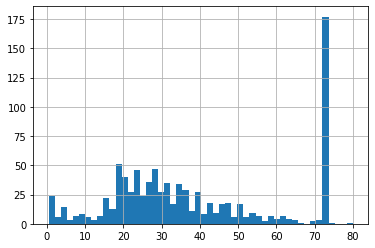

In [36]:
df['Age_end_distribution'].hist(bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


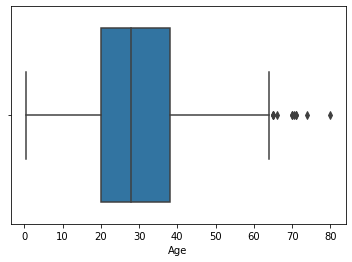

In [38]:
import seaborn as sns
sns.boxplot('Age',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


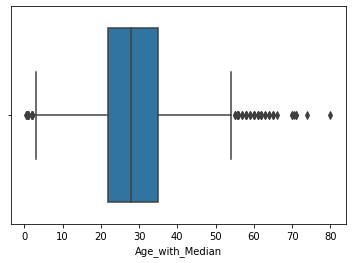

In [42]:
sns.boxplot('Age_with_Median',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


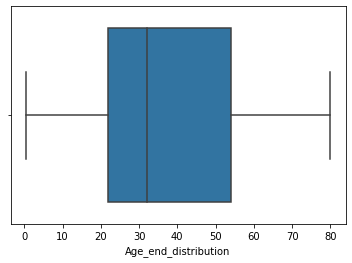

In [39]:
sns.boxplot('Age_end_distribution',data=df)

**Advantages**

1. It is quick and Easy to Implement
2. Captures the importance of missing values (if one suspects the missing data is valuable)

**Disadvantages**

1. Creating Additional Features(Curse of Dimensionality).
2. Distorts the original distribution of the variable.
3. If the number of NAs are big, it will mask true outliers in the distribution.
4. If the number of NAs are small, the replaced NA may be considered as an outlier and pre-processed in a subsequent step of feature engineering. 